# Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
trainset=pd.read_csv('train.csv')
trainset['joining_date'].head()

0     8/17/2017
1     8/28/2017
2    11/11/2016
3    10/29/2016
4     9/12/2017
Name: joining_date, dtype: object

In [6]:
month=[]
d=np.array(trainset['joining_date'])
for il in range(len(d)):
    month.append(((2021-(int(d[il].split("/")[2])))*12)+int(d[il].split("/")[0]))
trainset['Month']=month
trainset['Month']=trainset['Month'].astype(int)

In [7]:
trainset.drop(['referral_id','security_no','Name','customer_id','joining_date'],axis=1,inplace=True)
trainset.shape

(36992, 20)

In [8]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,56
1,32,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,56
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,71
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5,70
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5,57


# Data Pre-processing

In [9]:
def myfun(d_s):
    ar=np.array(d_s)
    for i in range(len(ar)):
        if(ar[i]=="?" or ar[i]=="Error" or ar[i]=="Unknown"):
            ar[i]=np.nan
    d_s=ar
    return d_s
def myfunint(d_set):
    a=np.array(d_set)
    for j in range(len(a)):
        if(a[j]<0):
            a[j]=0
    m=a.mean()
    for k in range(len(a)):
        if(a[k]==0):
            a[k]=int(m)
    d_set=a
    return d_set   

In [10]:
trainset['joined_through_referral'],trainset['gender'],trainset['medium_of_operation'],trainset['avg_frequency_login_days'],trainset['complaint_status']=myfun(trainset['joined_through_referral']),myfun(trainset['gender']),myfun(trainset['medium_of_operation']),myfun(trainset['avg_frequency_login_days']),myfun(trainset['complaint_status'])

In [11]:
trainset['days_since_last_login'],trainset['avg_time_spent']=myfunint(trainset['days_since_last_login']),myfunint(trainset['avg_time_spent'])

In [12]:
trainset.isnull().any()

age                             False
gender                           True
region_category                  True
membership_category             False
joined_through_referral          True
preferred_offer_types            True
medium_of_operation              True
internet_option                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days         True
points_in_wallet                 True
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
Month                           False
dtype: bool

###### Replacing of Nan values

In [13]:
col=['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation']
for c in range(len(col)):
    trainset[col[c]]=trainset[col[c]].fillna(value=trainset[col[c]].mode().iloc[0])

In [14]:
trainset['avg_frequency_login_days']=trainset['avg_frequency_login_days'].astype(float)
trainset['avg_frequency_login_days']=trainset['avg_frequency_login_days'].fillna(value=trainset['avg_frequency_login_days'].mean())
trainset['points_in_wallet']=trainset['points_in_wallet'].fillna(value=trainset['points_in_wallet'].mean())

In [15]:
trainset.isnull().any()

age                             False
gender                          False
region_category                 False
membership_category             False
joined_through_referral         False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
Month                           False
dtype: bool

###### Label Encoding

In [16]:
df_col=['gender','offer_application_preference','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','past_complaint','complaint_status','feedback']
for i in range(len(df_col)):
    trainset[df_col[i]] = LabelEncoder().fit_transform(trainset[df_col[i]])

In [17]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,1,0,1,4,2,56
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.882199,1,0,1,2,5,1,56
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,3,3,5,71
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,4,3,5,70
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,2,3,5,57


# Data Visualisations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6714D5F98>,
      dtype=object)

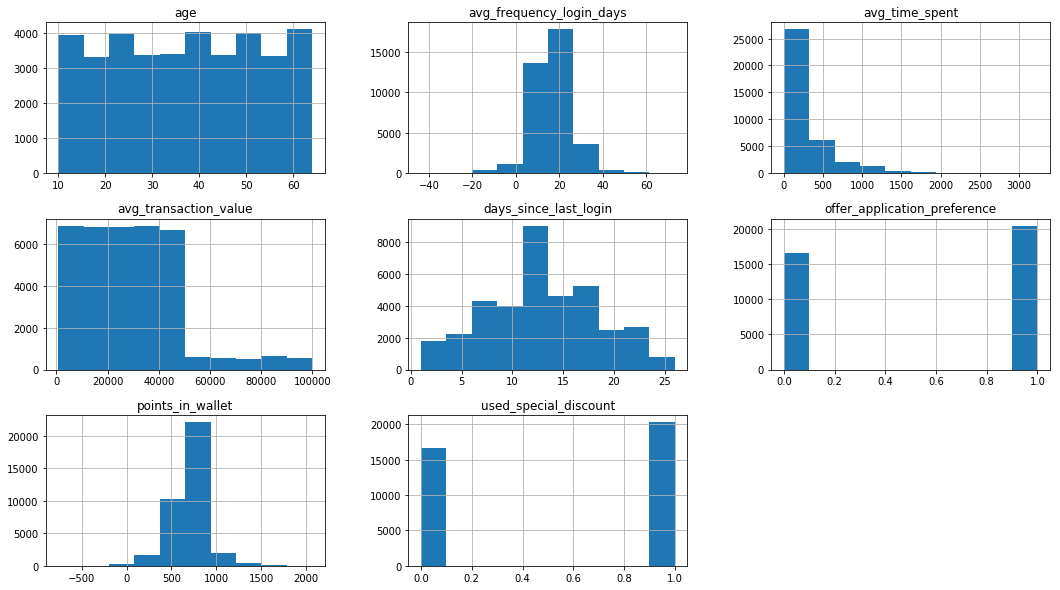

In [18]:
trainset.hist(['age','days_since_last_login','avg_time_spent','avg_transaction_value'
                 ,'avg_frequency_login_days','points_in_wallet','offer_application_preference','used_special_discount'],figsize=(18,10),)

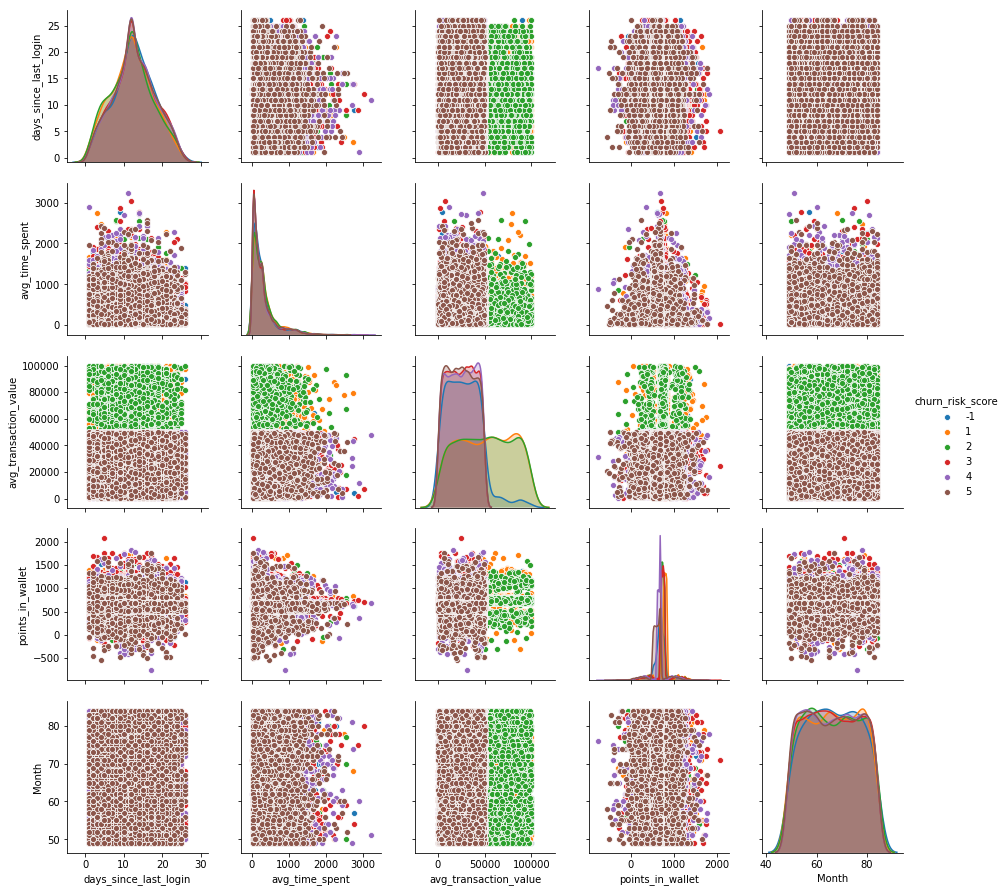

In [19]:
sns.pairplot(trainset, vars=['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet','Month'], hue = "churn_risk_score")

# Feture Extraction

###### Checking if any duplicate rows

In [20]:
dups = trainset.duplicated()
print(dups.any())
#print(trainset[dups])

False


###### Correlation

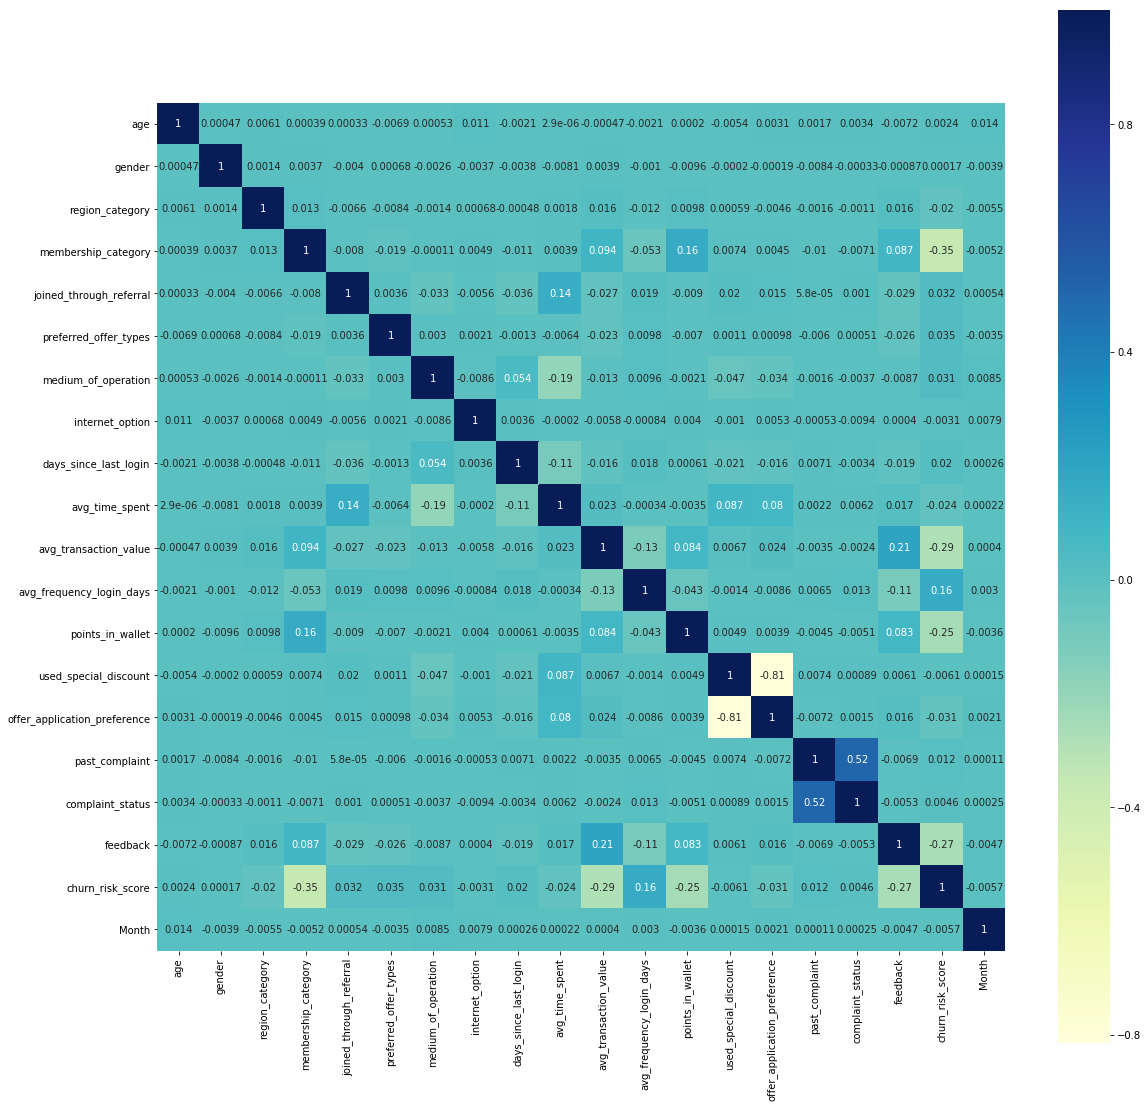

In [21]:
corr = trainset.corr()
plt.figure(figsize=(19,19))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')

In [22]:
def correlation(trainset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = trainset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(trainset, 0.8)
len(set(corr_features))

1

In [24]:
corr_features

{'offer_application_preference'}

In [25]:
trainset.drop('offer_application_preference', axis=1,inplace=True)

###### Varaince Threshold

In [26]:
x=trainset.drop(labels=['churn_risk_score'], axis=1)
y=trainset['churn_risk_score']
x.shape

(36992, 18)

In [27]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [28]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [114]:
len(x.columns[var_thres.get_support()])
#sum(var_thres.get_support())
x.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount', 'past_complaint',
       'complaint_status', 'feedback', 'Month'],
      dtype='object')

In [30]:
constant_columns = [column for column in x.columns
                    if column not in x.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [31]:
for column in constant_columns:
    print(column)

In [32]:
trainset.shape

(36992, 19)

In [33]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,0,1,4,2,56
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.882199,1,1,2,5,1,56
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,3,3,5,71
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,4,3,5,70
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,2,3,5,57


###### train test split

In [ ]:
y=trainset['churn_risk_score']
x=trainset
x.drop('churn_risk_score',axis=1,inplace=True)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Modelling

# KNN

In [159]:
pipeknn = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2))
])

In [160]:
pipeknn.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [161]:
y_predict_knn=pipeknn.predict(x_test)
y_predict_knn

array([4, 3, 3, ..., 3, 5, 4], dtype=int64)

In [162]:
acc_knn=accuracy_score(y_test,y_predict_knn)

In [163]:
df=pd.DataFrame({'knn':[acc_knn]})
df

,knn
0,0.40519


In [147]:
confusion_matrix(y_test,y_predict_knn)

array([[   4,   14,   16,   86,   58,   51],
       [   7,  187,  141,  114,   53,   43],
       [   9,  160,  172,  121,   48,   27],
       [  29,   73,   70, 1172,  505,  232],
       [  36,   46,   31,  745,  664,  546],
       [  30,   28,   11,  377,  694,  799]], dtype=int64)

# Logistic Regression

In [183]:
pipelr = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='newton-cg'))
])

In [184]:
pipelr.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [185]:
y_predict_lr=pipelr.predict(x_test)
y_predict_lr

array([3, 3, 4, ..., 4, 5, 5], dtype=int64)

In [186]:
acc_lr=accuracy_score(y_test,y_predict_lr)

In [187]:
df=pd.DataFrame({'knn':[acc_knn],'lr':[acc_lr]})
df

,knn,lr
0,0.40519,0.441276


In [188]:
confusion_matrix(y_test,y_predict_lr)

array([[   0,    7,   15,   85,   43,   79],
       [   0,  156,  165,  127,   53,   44],
       [   0,   98,  219,  151,   27,   42],
       [   0,   43,   81, 1386,  290,  281],
       [   0,   34,   32,  508,  468, 1026],
       [   0,   27,   10,   84,  782, 1036]], dtype=int64)

# SVM

In [200]:
pipesvm = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', SVC(kernel='rbf'))
])

In [201]:
pipesvm.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [202]:
y_predict_svm=pipesvm.predict(x_test)

In [203]:
acc_svm=accuracy_score(y_test,y_predict_svm)

In [204]:
df=pd.DataFrame({'knn':[acc_knn],'lr':[acc_lr],'nb':[acc_nb],'svm':[acc_svm]})
df

,knn,lr,nb,svm
0,0.40519,0.441276,0.538451,0.531693


# Random Forest Classifier

In [189]:
piperc = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=15,criterion='gini',random_state=0))
])

In [190]:
piperc.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=15, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [191]:
y_predict_rc=piperc.predict(x_test)
y_predict_rc

array([3, 2, 4, ..., 5, 5, 4], dtype=int64)

In [192]:
acc_rc=accuracy_score(y_test,y_predict_rc)

In [193]:
df=pd.DataFrame({'knn':[acc_knn],'lr':[acc_lr],'rc':[acc_rc]})
df

,knn,lr,rc
0,0.40519,0.441276,0.744019


In [194]:
confusion_matrix(y_test,y_predict_rc)

array([[   0,   15,   13,   76,   69,   56],
       [   1,  408,  127,    5,    3,    1],
       [   0,  150,  378,    4,    4,    1],
       [   0,    1,    0, 1894,  183,    3],
       [   0,    0,    0,  193, 1367,  508],
       [   0,    0,    0,    8,  473, 1458]], dtype=int64)

# Decision Tree

In [195]:
pipedt = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion='gini',max_depth=10, min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2,presort=False, random_state=None, splitter='best'))
])

In [196]:
pipedt.fit(x_train,y_train)

D:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=10, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=1e-07,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [197]:
y_predict_dt=pipedt.predict(x_test)

In [198]:
acc_dt=accuracy_score(y_test,y_predict_dt)

In [199]:
df=pd.DataFrame({'knn':[acc_knn],'lr':[acc_lr],'rc':[acc_rc],'dt':[acc_dt]})
df

,knn,lr,rc,dt
0,0.40519,0.441276,0.744019,0.752129


In [158]:
confusion_matrix(y_test,y_predict_dt)

array([[   2,   22,    6,   77,   45,   77],
       [   5,  476,   63,    0,    0,    1],
       [   2,  202,  326,    0,    6,    1],
       [  14,    0,    0, 1920,  144,    3],
       [   8,    0,    0,  227, 1032,  801],
       [   3,    0,    0,    0,  128, 1808]], dtype=int64)